In [7]:
import heapq
import requests as req
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywt
import scipy as sp
import statsmodels.api as sm
from scipy import fftpack
from scipy import interpolate
from scipy import signal
from scipy import stats
from sortedcontainers import SortedDict as sd
from collections import Counter
import tensorflow as tf

%matplotlib inline

In [2]:
ROOT = 'http://localhost:8080/argusws'
with open('.login.txt') as login:
    username = login.readline().rstrip()
    password = login.readline().rstrip()
login_info = json.dumps({'username':username, 'password':password})
headers = {'content-type':'application/json'}

In [3]:
auth = req.post(ROOT + '/auth/login', data=login_info, headers=headers)
cookies = auth.cookies

In [4]:
r = req.get(ROOT + '/metrics?expression=-5d:argus.jvm:mem.heap.used:avg', headers=headers, cookies=cookies)
data = sd(r.json()[0]['datapoints'])

In [5]:
keys = [int(key) for key in data.keys()]
diff_counts = Counter([keys[i+1] - keys[i] for i in range(len(keys)-1)])
values = [float(data[key]) for key in sorted(data.keys())]

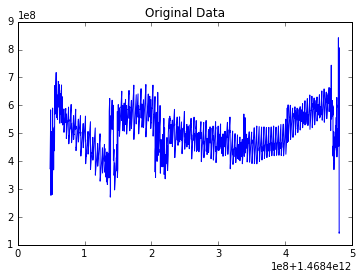

In [6]:
def plot_original_data(keys, values):
    plt.plot(keys, values)
    plt.title('Original Data')
    plt.show()
plot_original_data(keys, values)